# Python, Data, 2025

---

- motivace,
- úvod do knihoven, instalace,
- typy grafů
- cvičení 1, 2, 3
- tvorba jednoduchého grafu,
- detailní prvky grafu,
- kombinace Pand a matplotlib,
- kombinace Pand a seaborn.

---

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.Gr2a27W996qpjc9XHq_lNAHaHa%26pid%3DApi&f=1&ipt=75e655cef3d81414d74c3c49c1bed2c7a4eb506928ef5afc6c493766aaf0ccd8&ipo=images" width="250" style="margin-left:auto; margin-right:auto"/>

## Úvod do vizualizace

---



### Proč je vizualizace důležitá?

---

*Vizualizace* dat je jedním **z nejefektivnějších způsobů**, jak porozumět velkým množstvím informací.

Pomáhá:
- identifikovat vzory a trendy,
- odhalit anomálie,
- vysvětlit závěry širšímu (dokonce netechnickému) publiku.

Graf často odhalí to, co není vidět přímo v datech.

### Jak pracovat s existujícími daty?

---

In [1]:
import seaborn as sns
import pandas as pd

<br>

Načti jeden z předchystaných datasetů přímo v knihovně:

In [2]:
titanic_df = sns.load_dataset("titanic")

In [3]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Co chceme z dat zjistit?

---

Otázka: *„Záleželo přežití na pohlaví nebo cestovní třídě?“*

Tato otázka je konkrétní a měřitelná – pomocí dat zjistíme, zda a jak pohlaví nebo třída ovlivnily šanci na přežití.

#### Základní přehled hodnot ve sloupcích

---

In [4]:
titanic_df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [5]:
titanic_df["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

<br>

#### Odstraníme řádky s chybějící hodnotou v klíčových sloupcích

---

In [6]:
bez_chybejici_dat_df = titanic_df.dropna(subset=["sex", "class", "survived"])

In [7]:
bez_chybejici_dat_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Metoda `dropna` po zadání pole jmen sloupečků odstraní chybějící hodnoty.

<br>

### Jak nastavit jednoduchý graf?

---

Použiješ knihovnu `seaborn` pro vytvoření sloupcového grafu, který porovná přežití podle **pohlaví a třídy**.

In [8]:
import matplotlib.pyplot as plt

<br>

#### Zobrazení dat na sloupcovém grafu

---

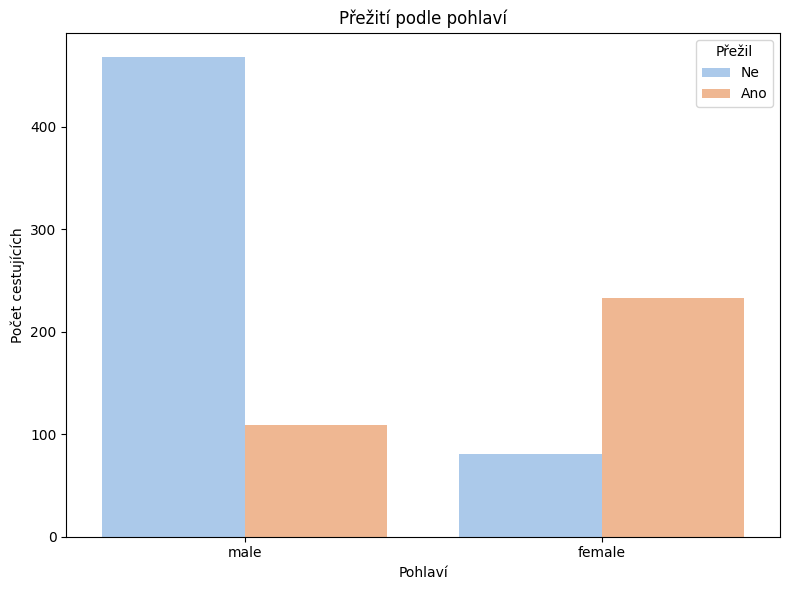

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=bez_chybejici_dat_df, x="sex", hue="survived", palette="pastel")
plt.title("Přežití podle pohlaví")
plt.xlabel("Pohlaví")
plt.ylabel("Počet cestujících")
plt.legend(title="Přežil", labels=["Ne", "Ano"])
plt.tight_layout()
plt.show()

#### Doplnění grafického výstupu podle pohlaví a cestovních tříd:

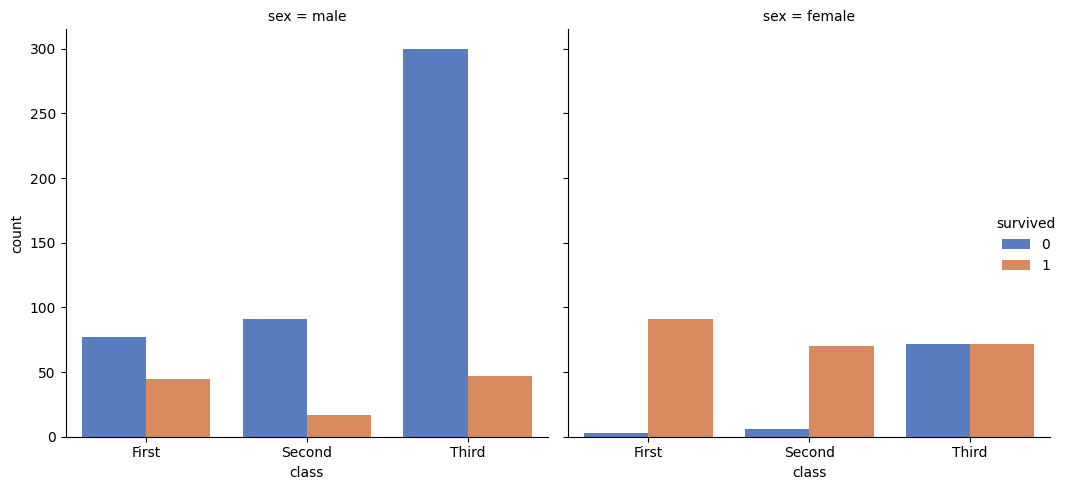

In [10]:
sns.catplot(data=bez_chybejici_dat_df, x="class", hue="survived", col="sex", kind="count", palette="muted")
plt.tight_layout()
plt.show()

### Souhrn

---

Z grafů je patrné, že ženy měly výrazně vyšší šanci na přežití než muži.

Také **první třída** měla vyšší šanci na přežití než nižší třídy – viz podrobnější rozdělení podle `class`.

### Jak nakonec data vyexportovat?

---

#### Vytvoření grafu

---

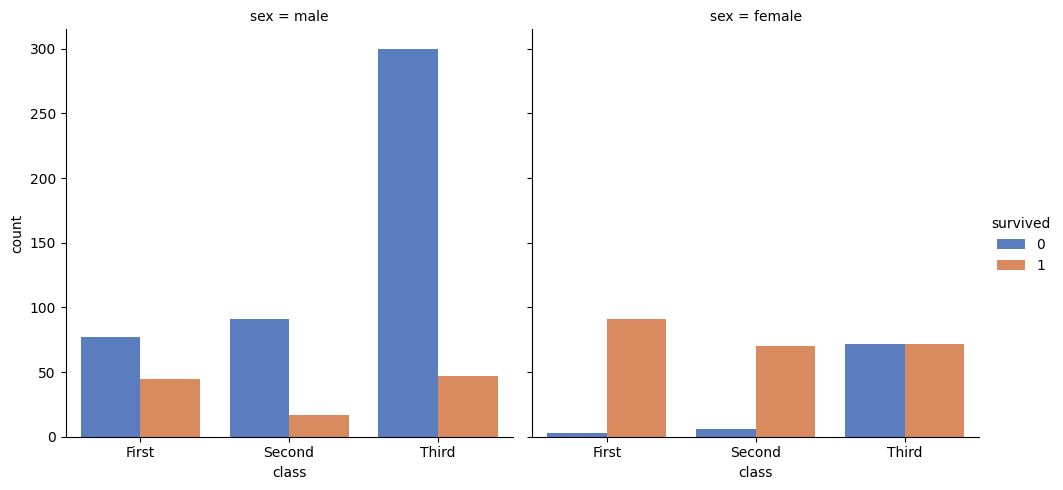

In [11]:
graf = sns.catplot(data=bez_chybejici_dat_df,
                   x="class",
                   hue="survived",
                   col="sex",
                   kind="count",
                   palette="muted")

##### Přidání nadpisu pro výstup

---

In [12]:
graf.fig.suptitle("Přežití podle třídy a pohlaví", y=1.05)

Text(0.5, 1.05, 'Přežití podle třídy a pohlaví')

##### Uložení grafu do souboru

---

In [13]:
graf.savefig("preziti_titanic.png")

<br>

## Úvod ke knihovnám

---

### Proč právě matplotlib a seaborn?

---
`matplotlib` je základní a nejpoužívanější knihovna pro tvorbu grafů v Pythonu.

Nabízí:
- Plnou kontrolu nad grafy (styl, barvy, osy, anotace),
- možnost exportu do různých formátů (PNG, SVG, PDF, atd.),
- kompatibilitu se všemi běžnými datovými nástroji v Pythonu.

<br>

`seaborn` je nadstavba nad `matplotlib`.

Zaměřuje se/zlepšuje:
- jednodušší syntaxi pro běžné úkoly,
- přednastavené vizuální styly (estetika!),
- lepší integraci s pandas dataframe.

### Jak nainstalovat knihovny?

---

Instalaci proveď v rámci *virtuálního prostředí*:

In [14]:
# !pip install matplotlib

In [15]:
# !pip install seaborn

... následná kontrola verzí obou knihoven.

<br>

Ohlášení pro použití knihovny v rámci skriptu s následným aliasem pro snadnější používání:

In [16]:
import matplotlib as mpl

In [17]:
import seaborn as sns

In [18]:
mpl.__version__

'3.7.5'

In [19]:
sns.__version__

'0.13.2'

### Kde najdu další informace pro práci?

---

- 📘 [Oficiální web matplotlib](https://matplotlib.org/)
- 📘 [Oficiální web seaborn](https://seaborn.pydata.org)

🔝 **Tip**: `seaborn` má skvělý gallery, kde si můžeš vybrat graf podle vzhledu.

### Jaké existují další alternativy pro práci s grafy?

---

V dnešní době existuje několik moderních alternativ pro různé účely:

| Knihovna        | Popis                                                                 |
|-----------------|------------------------------------------------------------------------|
| **Plotly**      | Interaktivní grafy, vhodné pro webové aplikace (např. Dash).           |
| **Altair**      | Deklarativní zápis, integrace s Pandas a Vega-Lite.                   |
| **Bokeh**       | Interaktivní vizualizace s podporou velkých datasetů a webových výstupů. |
| **Plotnine**    | Python port oblíbeného R balíčku ggplot2.                             |
| **Holoviews**   | Vysokoúrovňová knihovna nad Bokeh a Matplotlib s jednoduchou syntaxí. |

🔝 **Doporučení**, `matplotlib` + `seaborn` je výborný základ.

Pokud cílíš na pokročilejší vizualizace, interaktivní grafy, vyzkoušej `Altair` nebo `Plotly`.

<br>

## Typy grafů

---

Pro různé hodnoty a průběhy se ti budou hodit jiné typy grafů.

### 📊 Jaký typ grafu použít?

---

| Co chci zjistit / ukázat                                      | Typ grafu                 | Popis / Knihovny                          | Příklad scénáře |
|----------------------------------------------------------------|---------------------------|-------------------------------------------|------------------|
| 📈 Vývoj hodnot v čase                                          | `line plot`               | Čárový graf (`plt.plot()`, `df.plot()`)   | Průběh teplot během týdne |
| 📊 Rozložení hodnot jedné proměnné                              | `histogram`               | Histogram (`plt.hist()`, `sns.histplot()`)| Kolik lidí má jaký věk ve třídě |
| 📦 Rozložení + extrémy hodnot mezi skupinami                    | `boxplot`                 | `sns.boxplot()`, `plt.boxplot()`          | Porovnání platů v různých odděleních |
| 🧮 Srovnání kategorií podle četnosti                            | `bar plot`, `countplot`   | Sloupcový graf (`plt.bar()`, `sns.countplot()`) | Počet studentů v různých seminářích |
| 🍕 Poměrné rozdělení v rámci celku                              | `pie chart`               | Koláčový graf (`plt.pie()`) – používat opatrně | Rozdělení rozpočtu domácnosti |
| 🔵 Vztah mezi dvěma číselnými proměnnými                        | `scatter plot`            | Bodový graf (`plt.scatter()`, `sns.scatterplot()`) | Závislost mezi věkem a výší útraty |
| 🔥 Závislost mezi vícero proměnnými                             | `pairplot`, `heatmap`     | `sns.pairplot()`, `sns.heatmap()`         | Jak spolu souvisí výška, váha a věk |
| 🟦 Srovnání kategorií + další proměnná                          | `grouped bar plot`        | `sns.catplot(kind="bar", hue=...)`        | Srovnání přežití podle pohlaví a třídy na Titanicu |
| 🌫️ Hustota rozložení                                           | `kdeplot`, `violinplot`   | `sns.kdeplot()`, `sns.violinplot()`       | Rozložení známek studentů s vyznačenou hustotou |
| 🧱 Hustota bodů ve 2D prostoru                                  | `hexbin`                  | `plt.hexbin()`                            | Kde se nejvíc koncentrují zákazníci podle věku a útraty |

<br>

V tabulce výše najdeš spíše katalogově nebo orientačně, které typy grafů využiješ v jakých situacích.

<br>

## Nejčastější typy grafů a jejich použití

---

Jde zejména o tyto typy:
1. *plot*,
2. *scatter*,
3. *bar*,
4. *pie*,
5. *histogram*.

### Typ plot

---

**Plot** je čárový graf.

Ukazuje vývoj hodnot v čase nebo závislost dvou proměnných, kde jedna z nich je obvykle postupná (např. dny, roky, kroky).

Nejčastěji popisuje nějakou změnu v čase.

Např. *teplota během týdne*, *počet kroků za den*, *cena akcií*.

#### Vstupní hodnoty

---

In [20]:
dny = ["Po", "Út", "St", "Čt", "Pá", "So", "Ne"]

In [21]:
kroky = [3500, 4200, 3900, 5000, 4800, 7000, 6500]

#### Grafický výstup

---

Text(0, 0.5, 'Počet kroků')

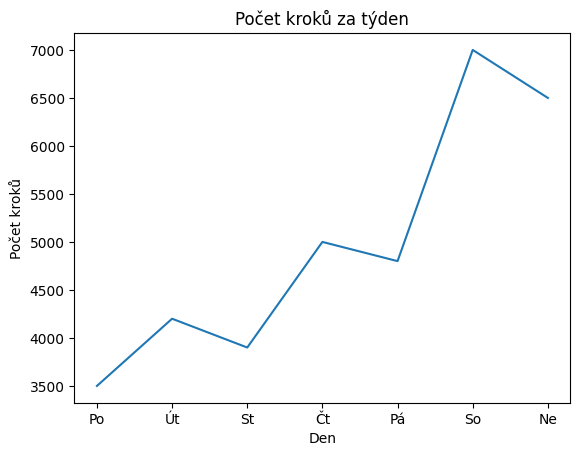

In [22]:
# Vykreslení
plt.plot(dny, kroky)

# Popisky
plt.title("Počet kroků za týden")
plt.xlabel("Den")
plt.ylabel("Počet kroků")

#### Co z grafu uvidíš?

---

- Na **ose X** budou dny v týdnu (Po až Ne),
- na **ose Y** bude počet kroků.

#### Shrnutí
---

Při relativně malém množství dat vidíš šikovný, grafický průběh.

<br>

### Typ scatter

---

**scatter** je bodový graf, který ukazuje vztah mezi **dvěma a více číselnými proměnnými**.

Pokud chceš zjistit, jestli spolu dvě věci nějak souvisí.

Např. „Když víc spím, mám víc energie?“ nebo „Když víc cvičím, vážím míň?

#### Vstupní hodnoty

---

In [23]:
delka_spanku_pres_tyden = [6, 7, 5, 8, 6.5, 7.5, 4]
pocit_energie = [4, 6, 3, 8, 5, 7, 2]

#### Grafický výstup

---

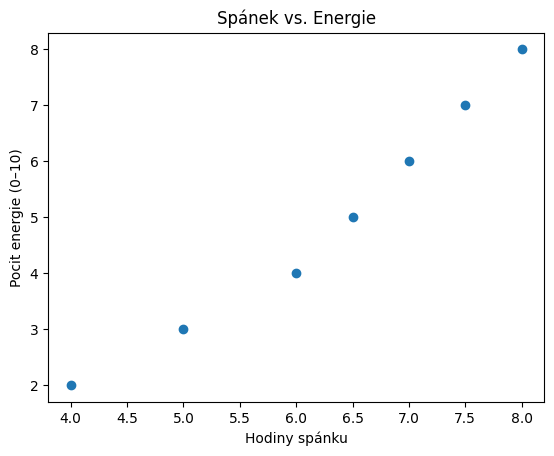

In [24]:
# Vykreslení
plt.scatter(delka_spanku_pres_tyden, pocit_energie)

# Popisky
plt.title("Spánek vs. Energie")
plt.xlabel("Hodiny spánku")
plt.ylabel("Pocit energie (0–10)")

# Zobrazit graf
plt.show()

#### Co z grafu uvidíš?
---

- **Osa X** = kolik hodin spíš,
- **osa Y** = kolik energie jsi máš.

Když body stoupají zprava nahoru, znamená to: **víc spánku → víc energie**.

#### 🧠 Shrnutí

---

Scatter používáš, pokud máš dvě číselné hodnoty a chceš vidět souvislost.

Nezobrazuje čas, ale vztah mezi proměnnými.

Výborný pro hledání vzorců, trendů nebo odlehlých bodů.

<br>

### Typ bar

---

**bar** je sloupcový graf, který ukazuje porovnání mezi kategoriemi.

Když chceš porovnat kolik lidí/co se vyskytuje v jednotlivých skupinách, resp. kategorizaci čehokoliv.

Např. *Kolik lidí má rádo jaký předmět?*

#### Vstupní hodnoty

---

In [25]:
predmety = ["Matematika", "Čeština", "Dějepis", "Informatika"]
oblibenost = [8, 5, 3, 10]

#### Grafický výstup

---

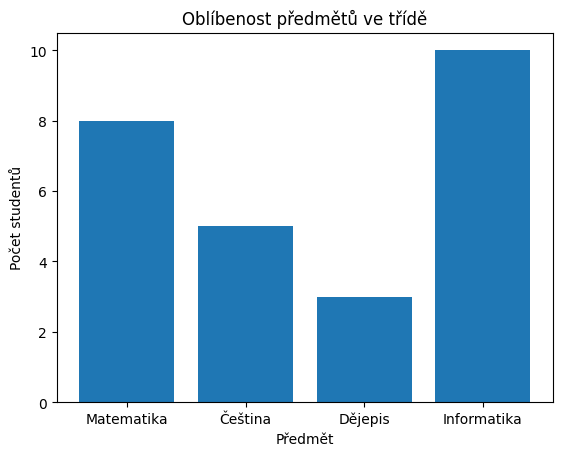

In [26]:
plt.bar(predmety, oblibenost)

plt.title("Oblíbenost předmětů ve třídě")
plt.xlabel("Předmět")
plt.ylabel("Počet studentů")

plt.show()

Každý sloupec ukazuje, kolik studentů má daný předmět rádo. Lehce porovnáš, který je nejoblíbenější.

<br>

### Typ histogram

---

**histogram** ukazuje rozložení hodnot, tedy kolik hodnot spadá **do jednotlivých rozsahů** (intervalů).

Tedy, když chceš vědět, kolik lidí je ve věku 10–15, 15–20, 20–25...

Hodí se pro větší počet čísel a jejich frekvenci.

#### Vstupní hodnoty

---

In [27]:
veky = [14, 15, 16, 17, 17, 18, 19, 20, 20, 22, 23, 24, 24, 25]

#### Grafický výstup

---

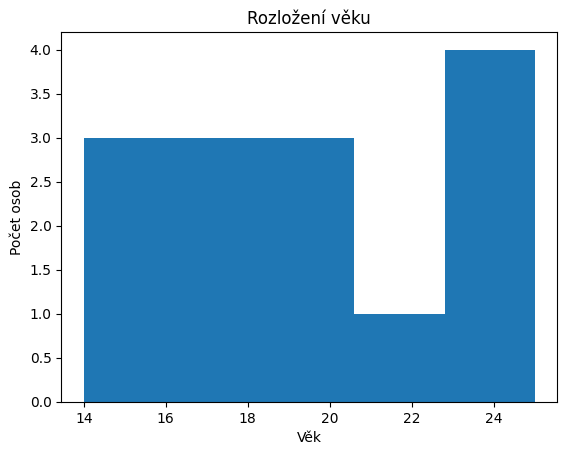

In [28]:
plt.hist(veky, bins=5)

plt.title("Rozložení věku")
plt.xlabel("Věk")
plt.ylabel("Počet osob")

plt.show()

Histogram rozdělí věky do skupin (např. 14–16, 16–18…) a ukáže, kolik lidí spadá do každé skupiny.

<br>

### Typ pie

---

**pie** je koláčový graf, který ukazuje jaký podíl tvoří jednotlivé části z celku.

Když chceš ukázat poměry nebo procenta.

Např. *Kolik procent tvoří jednotlivé druhy ovoce ve svačině?*

#### Vstupní hodnoty

---

In [29]:
ovoce_ke_svacine = ["Jablka", "Banány", "Hrušky", "Mandarinky"]
mnozstvi = [4, 2, 1, 3]

#### Grafický výstup

---

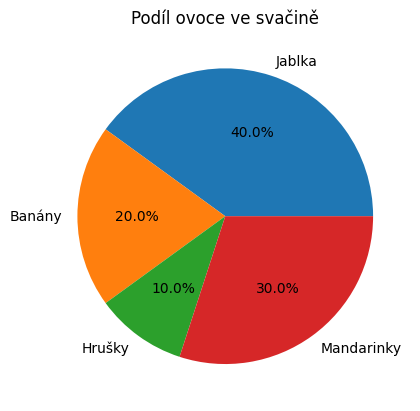

In [30]:
plt.pie(mnozstvi, labels=ovoce_ke_svacine, autopct="%1.1f%%")

plt.title("Podíl ovoce ve svačině")

plt.show()

Barevný koláč s jednotlivými dílky, které ukazují, jak velkou část tvoří každé ovoce. Např. že jablka tvoří největší podíl.

<br>

#### **🧠 CVIČENÍ 🧠, procvič si TYPY grafů**

---

**Úkol 1:** *Jak lidé tráví volný čas?*
    
Ve škole bylo dotázano 20 studentů, jaký typ volnočasové aktivity mají nejraději.

Odpovědi byly:
- Sport: 6
- Hraní her: 5
- Čtení: 3
- Hudba: 4
- Výtvarné aktivity: 2

➡️ **Zobraz výsledky pomocí vhodného grafu.**

#### Vstupní data

---

In [31]:
aktivity = ["Sport", "Hraní her", "Čtení", "Hudba", "Výtvarné aktivity"]
pocty = [6, 5, 3, 4, 2]

#### Zobrazení grafu

---

<details>
    <summary>▶️ Řešení</summary>
    
```python
aktivity = ["Sport", "Hraní her", "Čtení", "Hudba", "Výtvarné aktivity"]
pocty = [6, 5, 3, 4, 2]

# Graf
plt.bar(aktivity, pocty, color="skyblue")

# Popisky
plt.title("Oblíbené volnočasové aktivity studentů")
plt.xlabel("Aktivita")
plt.ylabel("Počet studentů")

# Zobrazení
plt.show()
```
</details>

**Úkol 2:** *Kolik hodin spánku studenti mají?*

Ze stejného průzkumu máme i údaje, kolik hodin studenti obvykle spí za den.

➡️ **Zobraz rozložení počtu hodin spánku pomocí vhodného grafu.**

#### Vstupní data

---

In [32]:
delka_spanku = [6.5, 7, 8, 5, 6, 7.5, 6.5, 5.5, 8, 7, 6, 6.5, 7, 5, 6, 7.5, 8.5, 6, 6.5, 7]

#### Zobrazení grafu

---

<details>
    <summary>▶️ Řešení</summary>
    
```python
# Data
delka_spanku = [6.5, 7, 8, 5, 6, 7.5, 6.5, 5.5, 8, 7, 6, 6.5, 7, 5, 6, 7.5, 8.5, 6, 6.5, 7]

# Graf
plt.hist(delka_spanku, bins=5, color="lightgreen", edgecolor="black")

# Popisky
plt.title("Rozložení hodin spánku studentů")
plt.xlabel("Hodiny spánku")
plt.ylabel("Počet studentů")

# Zobrazení
plt.show()
```
</details>

<br>

#### **🧠 CVIČENÍ PRO POKROČILÉ 🧠, procvič si TYPY grafů**

---

Cílem této úlohy je vytvořit takový graf, který zobrazuje zastoupení různých kategorií produktů podle jejich prodeje ve fiktivním obchodě.

1. Vytvoř **graf zobrazující procentuální zastoupení** různých kategorií produktů podle jejich prodeje.
2. nastav vlastní barvy pro jednotlivé kategorie grafu.
3. přidej **popisky os** a **legendu**, která zobrazuje **názvy kategorií** produktů a jejich procentuální zastoupení v prodeji.
4. ulož výsledný graf do souboru **ve formátu PNG**.

In [33]:
data = {"Elektronika": 150000,
        "Oblečení": 95000,
        "Domácí potřeby": 120000,
        "Kosmetika": 85000,
        "Hračky": 55000}

In [34]:
barvy = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#### Popisky a další konstanty

---

#### Vytvoření grafu

---

<details>
    <summary>▶️ Řešení</summary>
    
```python
# Rozdělení dat
labels = list(data.keys())
sizes = list(data.values())

# Vlastní barvy
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Vytvoření koláčového grafu
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.f%%', startangle=90)

# Nastavení názvů os a legendy
ax.set_title('Prodejní zastoupení kategorií produktů')
ax.legend(title='Kategorie', loc='upper right', bbox_to_anchor=(1, 0.5))

# Uložení grafu do souboru PNG
plt.savefig('pie_chart.png', dpi=300, bbox_inches='tight')

# Zobrazení grafu
plt.show()

# Alternativa>>>
plt.pie(data.values(), 
        labels = data.keys(), 
        colors = barvy, 
        autopct='%1.0f%%', 
        wedgeprops={'linewidth': 3.0, 'edgecolor': props_color},
        textprops={'color': props_color, 'size': 'x-large'})

# Přidání popisků grafu a legendy
plt.title(plot_title, fontsize=25)
plt.legend(loc='lower right',
           fontsize = 12,
           bbox_to_anchor=(1.35, 0.6))


# Úprava velikosti grafu
plt.gcf().set_size_inches(10, 7)

# Zobrazení grafu
plt.show( )
```
</details>

## Vytvoření jednoduchého grafu

---

Celý postup pro práci s daty a grafickým výstupem má přibližně takový průběh:
1. **Nahrávání knihoven, načítání dat**,
2. **Volání vykreslovací metody**, `plt.plot(x, y)`, ...
3. **Stylování a formátování**,
    - barvy (color),
    - typ čáry (linestyle),
    - tloušťka (linewidth),
    - značky (marker),
5. **Popisky a nadpisy**, plt.title(), plt.xlabel(), plt.ylabel()
6. **Mřížka a legenda**, plt.grid(True), plt.legend()
7. **Uložení grafu**, plt.savefig("nazev.png")

### Nahrávání & načítání

---

In [35]:
import matplotlib.pyplot

In [36]:
import matplotlib.pyplot as plt

Standard je práce **s aliasem**.

Načtení dat potom zpřístupní knihovna `pandas`:

In [37]:
import pandas as pd

#### Načteme Excel soubor

---

In [38]:
file_path = "../onsite/RESULT_LIST_ANONYM_CAPACITY_MARKET_FCR_2025-05-20_2025-05-20.xlsx"

In [39]:
excel_df = pd.read_excel(file_path)

/home/matous/projects/python-data/env/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [40]:
excel_df.head()

,DATE_FROM,DATE_TO,TYPE_OF_RESERVES,PRODUCT,OFFERED_CAPACITY_PRICE_[EUR/MW],OFFERED_CAPACITY_[MW],ALLOCATED_CAPACITY_[MW],COUNTRY,SETTLEMENTCAPACITY_PRICE_[EUR/MW],NOTE
0,2025-05-20,2025-05-20,FCR,NEGPOS_00_04,0.0,10,10,DE,22.0,NaN
1,2025-05-20,2025-05-20,FCR,NEGPOS_00_04,0.0,5,5,DE,22.0,NaN
2,2025-05-20,2025-05-20,FCR,NEGPOS_00_04,0.0,4,4,DE,22.0,NaN
3,2025-05-20,2025-05-20,FCR,NEGPOS_00_04,0.0,5,5,DE,22.0,NaN
4,2025-05-20,2025-05-20,FCR,NEGPOS_00_04,0.0,1,1,DE,22.0,NaN


Pokud budeš potřebovat zpracovat v rámci souboru několik sešitů:

In [41]:
excel_file = pd.ExcelFile(file_path)

/home/matous/projects/python-data/env/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


#### Zobrazíme názvy listů v Excelu

---

In [42]:
sheet_names = excel_file.sheet_names

In [43]:
sheet_names

['001']

In [44]:
df = excel_file.parse(sheet_name="001")

#### Zobrazíme první řádky

---

In [45]:
df.head()

,DATE_FROM,DATE_TO,TYPE_OF_RESERVES,PRODUCT,OFFERED_CAPACITY_PRICE_[EUR/MW],OFFERED_CAPACITY_[MW],ALLOCATED_CAPACITY_[MW],COUNTRY,SETTLEMENTCAPACITY_PRICE_[EUR/MW],NOTE
0,2025-05-20,2025-05-20,FCR,NEGPOS_00_04,0.0,10,10,DE,22.0,NaN
1,2025-05-20,2025-05-20,FCR,NEGPOS_00_04,0.0,5,5,DE,22.0,NaN
2,2025-05-20,2025-05-20,FCR,NEGPOS_00_04,0.0,4,4,DE,22.0,NaN
3,2025-05-20,2025-05-20,FCR,NEGPOS_00_04,0.0,5,5,DE,22.0,NaN
4,2025-05-20,2025-05-20,FCR,NEGPOS_00_04,0.0,1,1,DE,22.0,NaN


### Vykreslovací metody, co budeme popisovat?

---

**Zajímá tě**: *Kolik kapacity bylo alokováno v každé zemi?*

Použijeme k tomu sloupcový graf (`bar chart`), kde:
- **osa X** = zkratka země (např. DE, CZ),
- **osa Y** = celkové množství alokované kapacity v MW.

Před samotným zobrazováním ale potřebuješ data trochu "učesat", seskupit:

#### Spočítáme celkovou kapacitu pro každou zemi

---

In [46]:
df_grouped = df.groupby("COUNTRY")["ALLOCATED_CAPACITY_[MW]"].sum()

<br>

#### Seřadíme od nejvyšší po nejnižší

---

In [47]:
df_grouped = df_grouped.sort_values(ascending=False)

In [48]:
df_grouped

COUNTRY
FR    4020
DE    3092
AT     545
BE     346
NL     341
CZ     340
CH     226
DK      53
SI      19
Name: ALLOCATED_CAPACITY_[MW], dtype: int64

#### Vytvoření sloupcového grafu

---

In [49]:
countries = df_grouped.index.tolist()
capacities = df_grouped.values.tolist()

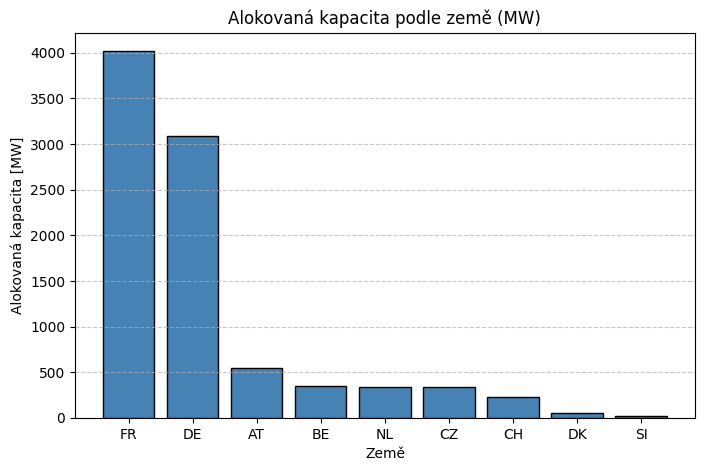

In [50]:
# Vykreslení grafu
obr = plt.figure(figsize=(8, 5))
plt.bar(countries, capacities, color="steelblue", edgecolor="black")

plt.title("Alokovaná kapacita podle země (MW)")
plt.xlabel("Země")
plt.ylabel("Alokovaná kapacita [MW]")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("alokovana_kapacita_podle_zeme.png")

plt.show()

<br>

Další podporované suffixy, které ti knihovna defaultně poskytne pro další práci:

In [51]:
obr.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

<br>

Uložený graf najdeš jako výstup v aktuálním adresáři.

#### Detaily objektů

---

- `figure`, vytváří nový „prázdný“ obrázek, do kterého se kreslí grafy. Bez něj by se graf vykreslil do výchozí (defaultní) plochy.
| Parametr | Popis | Příklad |
| :-: | :- | :- |
| `figsize` | Velikost obrázku v palcích (šířka, výška) | `figsize=(8, 5)` |
| `dpi` | Kvalita (rozlišení) při exportu obrázku |	`dpi=100` |

- `bar`, vytváří sloupcový (bar) graf – každý sloupec odpovídá jedné hodnotě z osy X a jeho výška odpovídá hodnotě Y.

| Parametr | Popis | Příklad |
| :-: | :- | :- |
| `x` | Kategorie nebo štítky na ose X | `x=["A", "B", "C"]` |
| `height` | Hodnoty na ose Y | `height=[5, 2, 7]` |
| `color` | Výplňová barva sloupce	| `"blue"`, `"#06b085"` |
| `edgecolor` |	Barva okraje sloupce | `"black"` |
| `width` |	Šířka sloupců |	`0.6` |
| `label` |	Popisek pro legendu| `"DE"` |

- `grid`, zobrazí mřížku pro lepší čitelnost hodnot.

| Parametr | Popis | Příklad |
| :-: | :- | :- |
| axis |	"x", "y" nebo "both" |	axis="y" |
| linestyle |	Styl čáry ("--", ":", "-.")| 	"--" |
| alpha | Průhlednost čáry (0–1) | 0.5 |

- `savefig`,

| Parametr | Popis | Příklad |
| :-: | :- | :- |
| `fname` |	Název a přípona souboru	| "graf1.png" |
| `dpi` |	Rozlišení |	`dpi=300` |
| `transparent` | Uložení s průhledným pozadím (bool) |	`transparent=True` |
| `bbox_inches` | Oříznutí okrajů ('tight' doporučeno) | `bbox_inches='tight'` |

- `show`, zobrazí vytvořený graf. Jupyter notebook to umí i bez něj, ale je do nutnost ve skriptu/modulu.

### Upravená ukázka pro `seaborn`

---

In [52]:
import seaborn as sns

In [53]:
df = pd.read_excel("../onsite/RESULT_LIST_ANONYM_CAPACITY_MARKET_FCR_2025-05-20_2025-05-20.xlsx", sheet_name="001")

/home/matous/projects/python-data/env/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [54]:
df_grouped = df.groupby("COUNTRY")["ALLOCATED_CAPACITY_[MW]"].sum().reset_index()

In [55]:
df_grouped = df_grouped.sort_values("ALLOCATED_CAPACITY_[MW]", ascending=False)

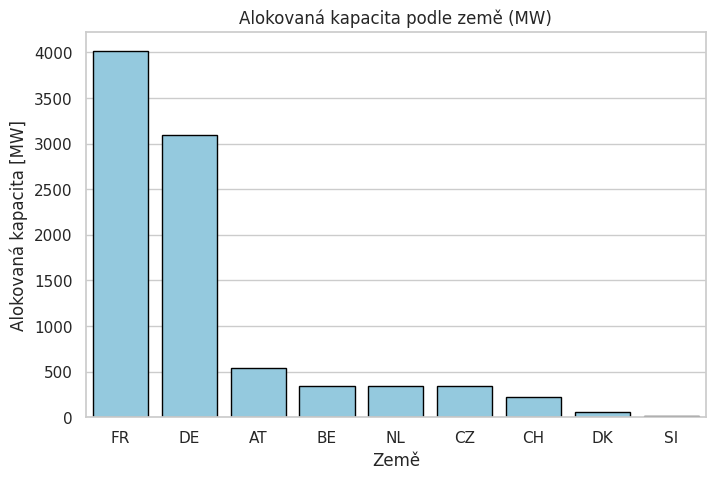

In [56]:
sns.set(style="whitegrid")  # Defaultní styl, bez úprav

plt.figure(figsize=(8, 5))
sns.barplot(data=df_grouped,
            x="COUNTRY",
            y="ALLOCATED_CAPACITY_[MW]",
            color="skyblue",
            edgecolor="black")

plt.title("Alokovaná kapacita podle země (MW)")
plt.xlabel("Země")
plt.ylabel("Alokovaná kapacita [MW]")

plt.show()

### Srovnání knihoven `matplotlib` vs. `seaborn`

---


| Kritérium               | `matplotlib`                                     | `seaborn`                                      |
|-------------------------|--------------------------------------------------|------------------------------------------------|
| **Zápis**               | Ručně specifikujeme `x` a `y`                    | Pracujeme přímo s `DataFrame`                 |
| **Styl a vzhled**       | Základní, vyžaduje víc ladění                    | Moderní vzhled už ve výchozím nastavení       |
| **Rozšíření (`hue`, ...)** | Nutno řešit ručně                              | Snadné díky parametrům jako `hue`, `col`, ... |
| **Flexibilita**         | Velmi vysoká, ale více kódu                     | Efektivní a úsporná syntaxe pro běžné případy |
| **Vhodné pro**          | Detailní kontrolu, pokročilé grafy              | Rychlou, elegantní vizualizaci                |
| **Výchozí styl**        | Spíše technický                                 | Elegantní a čitelný                           |


<br>

#### **🧠 CVIČENÍ 🧠, procvič si první úlohu s vlastním grafem**

---

Vyhotov jednotlivé kroky:
1. Vytvoř vlastní DataFrame s výše uvedenými daty.
2. rozděl vygenerované hodnoty do kategorií `bins` a `labels`,
3. rozdělené kategorie zapiš do sloupečku `Věková skupina`,
4. seskup data podle `Věková skupina` a získej průměrnou hodnotu času u obr. pro každou skupinu,
5. zaokrouhli desetinné číslo na jednu desetinu,
6. Vykresli sloupcový graf pomocí `matplotlib`.
7. Vykresli tentýž graf pomocí `seaborn`.
8. Styluj oba grafy tak, aby byly přehledné a prezentovatelné.
9. Napiš krátké srovnání rozdílu v zápisu a vzhledu.

#### Věkové skupiny a průměrný čas u obrazovky (v hodinách za den)

---

In [57]:
import numpy as np

In [58]:
n = 10_000_000
bins = [9, 14, 19, 24, 29, 34, 39, 44]
labels = ["10–14", "15–19", "20–24", "25–29", "30–34", "35–39", "40–44"]

#### Věkový rozsah: od 10 do 44 let (věk jako celé číslo)

---

In [59]:
vek = np.random.randint(10, 45, size=n)

#### Čas u obrazovky v hodinách: náhodně podle věku (čím mladší, tím spíš víc)
---
Např. základ: 2–7 h, s lehkou variabilitou

In [60]:
cas = np.clip(np.random.normal(loc=7 - 0.1 * vek, scale=0.8, size=n), 
              a_min=0, a_max=None)

#### Zaokrouhlíme na 1 desetinné místo

---

In [61]:
cas = np.round(cas, 1)

#### `matplotlib`

---

#### `seaborn`

---

<details>
    <summary>▶️ Řešení</summary>
    
```python
df_data = pd.DataFrame({"Věk": vek, "Čas u obrazovky (h/den)": cas})
df_data["Věková skupina"] = pd.cut(df_data["Věk"], bins=bins, labels=labels)
df_grouped = df_data.groupby("Věková skupina")["Čas u obrazovky (h/den)"].mean().reset_index()
df_grouped["Čas u obrazovky (h/den)"] = df_grouped["Čas u obrazovky (h/den)"].round(1)

# matplotlib
plt.figure(figsize=(8, 5))
plt.bar(df_grouped["Věková skupina"], df_grouped["Čas u obrazovky (h/den)"], color="cornflowerblue", edgecolor="black")

plt.title("Průměrná doba u obrazovky podle věku (simulovaná data)")
plt.xlabel("Věková skupina")
plt.ylabel("Průměrný čas (h/den)")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

# seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

sns.barplot(data=df_grouped,
            x="Věková skupina",
            y="Čas u obrazovky (h/den)",
            color="lightblue",
            edgecolor="black")

plt.title("Průměrná doba u obrazovky podle věku (simulovaná data)")
plt.xlabel("Věková skupina")
plt.ylabel("Průměrný čas (h/den)")

plt.show()
```
</details>

<br>

## Prvky grafu

---


U nového grafu je obvykle potřeba **zajistit dva prvky**:
* `axes` - tedy osy, chystaného grafu. Hodnoty, které hodláš zobrazit,
* `figure` - objekty grafů (legenda, nadpis, detaily čáry grafu).

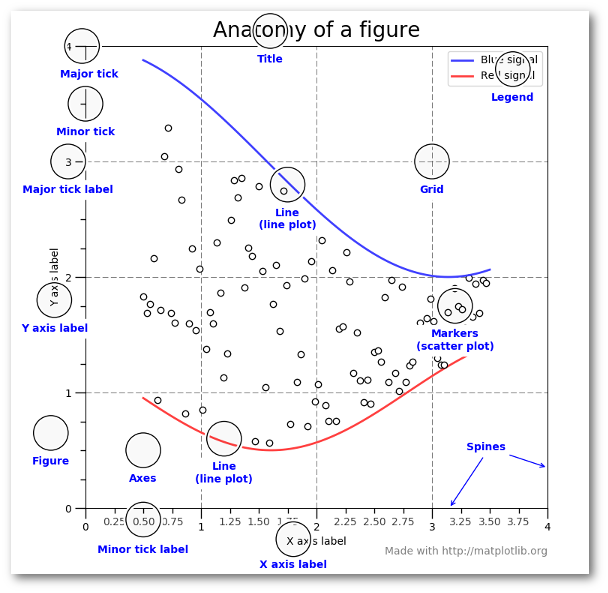

<br>

Objekt `figure` je místo, které obsahuje všechny objekty reprezentující **grafiku, text a obrázky** okolo,

Zatímco `axes` reprezentuje grafické prostředí.

Tedy rámeček se značkami a popisky, který bude případně obsahovat prvky z funkce `plot`, které tvoří vizualizaci. 

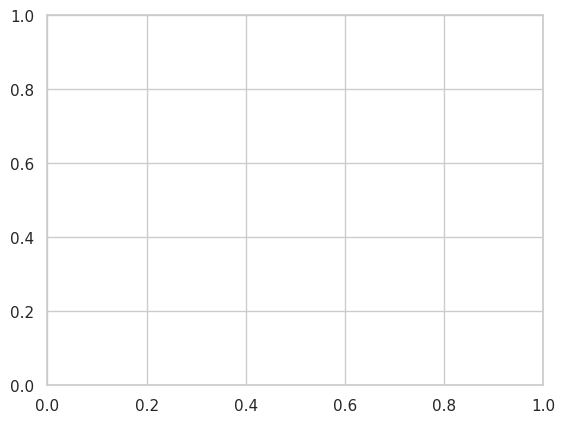

In [62]:
obr = plt.figure()
osy = plt.axes()

<br>

Pokud ti stačí opravdu jednoduchý graf, můžeš pracovat (jako v ukázce), pomocí samotné funkce `plot`.

Ta si sama, na pozadí vytvoří defaultní hodnoty pro `axes` a `figures`.

[]

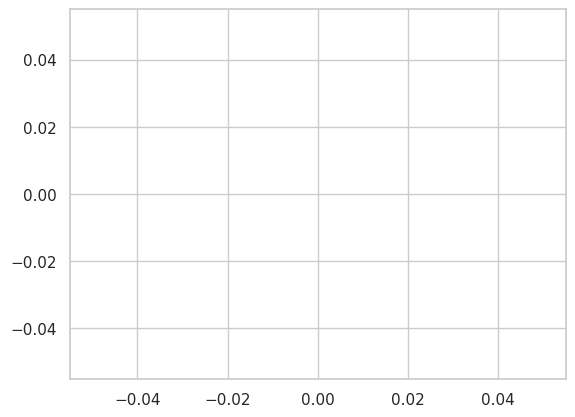

In [63]:
plt.plot()

<br>

Pomocné vstupní hodnoty pro vyzobrazení průběhu s `matplotlib`:

In [64]:
x = [0, 1, 2, 3, 4]
y = [-1, 1, -2, 2, -3]

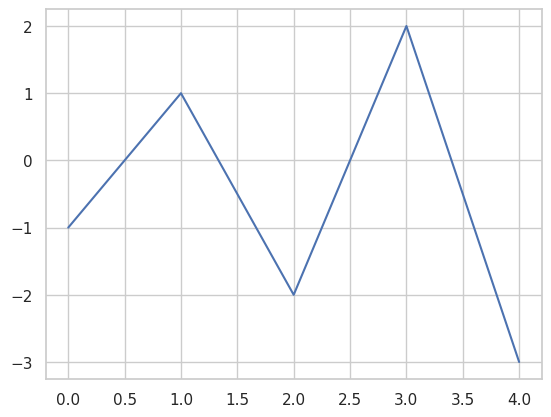

In [65]:
plt.plot(x, y)

Analogický postup za použití DataFrame objektu a knihovny `seaborn`:

In [66]:
data = pd.DataFrame({'Osa x': [0, 1, 2, 3, 4], 'Osa y': [-1, 1, -2, 2, -3]})

In [67]:
data.head()

,Osa x,Osa y
0,0,-1
1,1,1
2,2,-2
3,3,2
4,4,-3


Všimni si, že pro `seaborn` je typické, vycházet z hodnot, z tabulky.

<br>

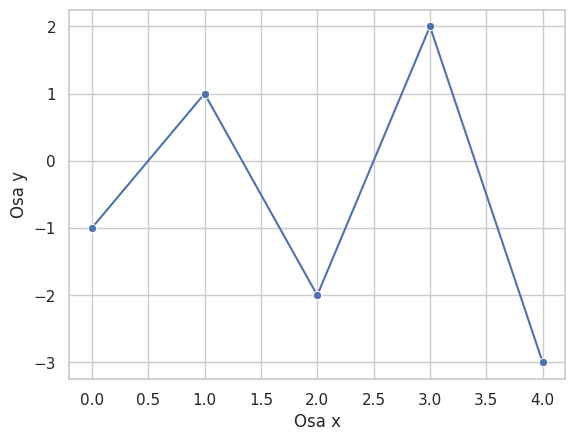

In [68]:
sns.lineplot(data=data, x='Osa x', y='Osa y', marker='o')

plt.show()

Ale opatrně na nekonzistenci jmen os!

In [69]:
# sns.lineplot(data=data, x='x', y='y', marker='o')
# plt.show()

<br>

#### **🧠 CVIČENÍ 🧠, transformace DataFrame a vykreslení čárového grafu**

---

Máte následující tabulku, která obsahuje informace o měsíčních výdajích na různé kategorie:

* Měsíce (months): Leden, Únor, Březen, Duben, Květen.
* Výdaje na potraviny (food): 1200, 1500, 1300, 1400, 1350.
* Výdaje na dopravu (transport): 300, 350, 400, 320, 310.


Vaším úkolem je:
* Převést sloupec měsíce (months) na index tabulky.
* Přidat nový sloupec total_expenses, který bude součtem výdajů na potraviny a dopravu.
* Vykreslit čárový graf, který bude zobrazovat celkové výdaje (total_expenses) v jednotlivých měsících.

| month | food | transport | total_expenses |
| :-: | :-: | :-: | :-: | 
| Leden |     1200   |     300    |        1500 |
| Únor   |    1500   |     350    |        1850 |
| Březen  |   1300   |     400    |        1700 |
| Duben    |  1400   |     320    |        1720 |
| Květen   |  1350   |     310    |        1660 |

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_df = pd.DataFrame({
    'months': ['Leden', 'Únor', 'Březen', 'Duben', 'Květen'],
    'food': [1200, 1500, 1300, 1400, 1350],
    'transport': [300, 350, 400, 320, 310]
})

<details>
    <summary>▶️ Řešení</summary>
    
```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'months': ['Leden', 'Únor', 'Březen', 'Duben', 'Květen'],
    'food': [1200, 1500, 1300, 1400, 1350],
    'transport': [300, 350, 400, 320, 310]
})

data.set_index('months', inplace=True)

data['total_expenses'] = data['food'] + data['transport']

sns.lineplot(data=data, x=data.index, y='total_expenses', marker='o')

plt.title('Celkové výdaje v jednotlivých měsících')
plt.xlabel('Měsíce')
plt.ylabel('Celkové výdaje (Kč)')

plt.show()
```
</details>

Všechny grafy lze **značně** *customizovat*.

Mezi nejčastější úpravy patří zejména:
* styl čáry & barva čáry,
* body čáry,
* mřížku,
* osy,
* popisky,
* legendu.

<br>

Pro všechny úpravy grafů, které se ti mohou hodit, omkrni funkci `plot`:

In [71]:
# help(plt.plot)

<br>

### Styl čáry

---

Pomocí argumentu `linestyle` definuješ **styl čáry** (nebo také formát čáry):

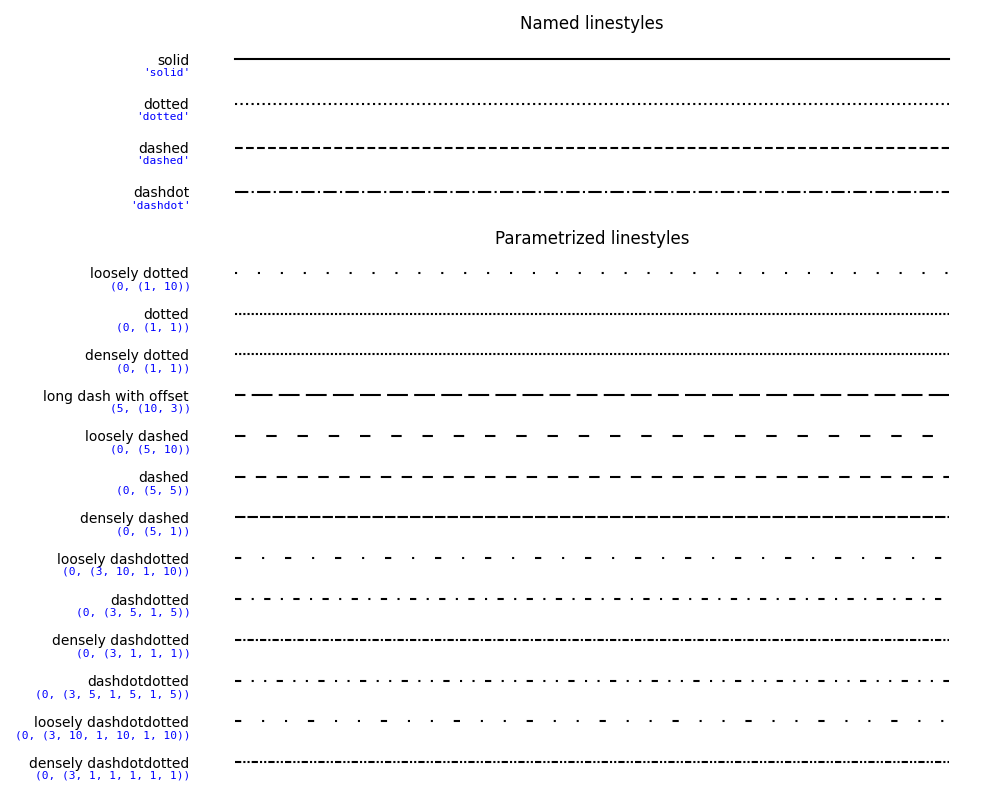

In [72]:
import numpy

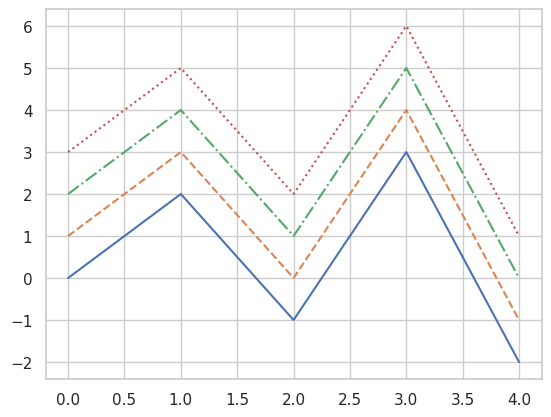

In [73]:
plt.plot(x, numpy.array(y) + 1, linestyle='solid')
plt.plot(x, numpy.array(y) + 2, linestyle='dashed')
plt.plot(x, numpy.array(y) + 3, linestyle='dashdot')
plt.plot(x, numpy.array(y) + 4, linestyle='dotted')

<br>

Můžeš také použít ekvivalentní označení pomocí **znaků**:

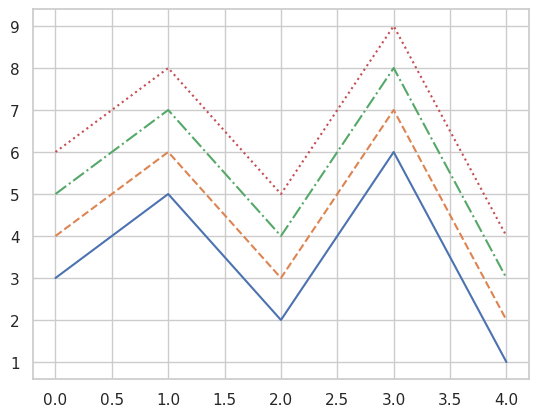

In [74]:
plt.plot(x, numpy.array(y) + 4, linestyle='-')   # solid
plt.plot(x, numpy.array(y) + 5, linestyle='--')  # dashed
plt.plot(x, numpy.array(y) + 6, linestyle='-.')  # dashdot
plt.plot(x, numpy.array(y) + 7, linestyle=':');  # dotted

<br>

### Barva čáry

---

Pokud chceš upravit barvu, můžeš použít klíčové slovo `color`.

To přijímá argument řetězce představující prakticky jakoukoli představitelnou barvu.

In [75]:
import matplotlib as mpl

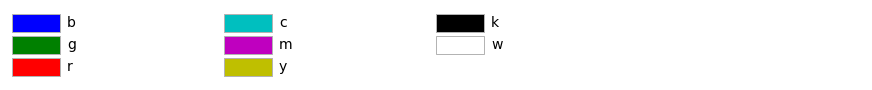

<br>

Pokud barvu neuvedeš, knihovna vybere automaticky ze základní palety barev.

In [76]:
# mpl.colors.CSS4_COLORS  # 148 barev
# mpl.colors.XKCD_COLORS  # 949 barev
mpl.colors.BASE_COLORS    # 8 barev

{'b': (0, 0, 1),
 'g': (0, 0.5, 0),
 'r': (1, 0, 0),
 'c': (0, 0.75, 0.75),
 'm': (0.75, 0, 0.75),
 'y': (0.75, 0.75, 0),
 'k': (0, 0, 0),
 'w': (1, 1, 1)}

<br>

Dále můžeš kombinovat různé formáty pro specifikaci barev u čas:

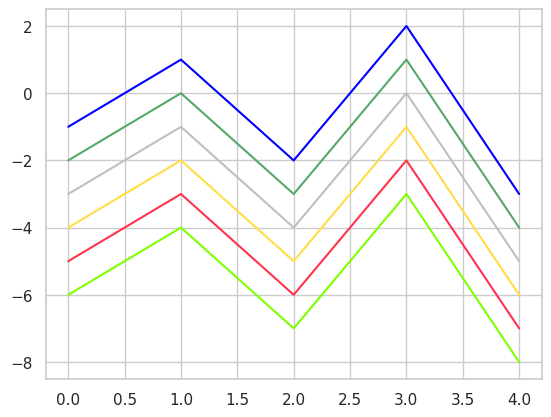

In [77]:
plt.plot(x, numpy.array(y) - 0, color='blue')          # barva podle jmena
plt.plot(x, numpy.array(y) - 1, color='g')             # krátky barevný kód (rgbcmyk)
plt.plot(x, numpy.array(y) - 2, color='0.75')          # Stupně šedi od 0 do 1
plt.plot(x, numpy.array(y) - 3, color='#FFDD44')       # Hexa kód (RRGGBB od 00 do FF)
plt.plot(x, numpy.array(y) - 4, color=(1.0, 0.2, 0.3)) # RGB tuple, hodnoty od 0 do 1
plt.plot(x, numpy.array(y) - 5, color='chartreuse');   # Všechny HTML názvy barev, které jsou podporované

<br>

Pokud chceš být extrémně stručný, můžeš jak styly čáry, tak barevné kódy zkombinovat **do jediného argumentu**:

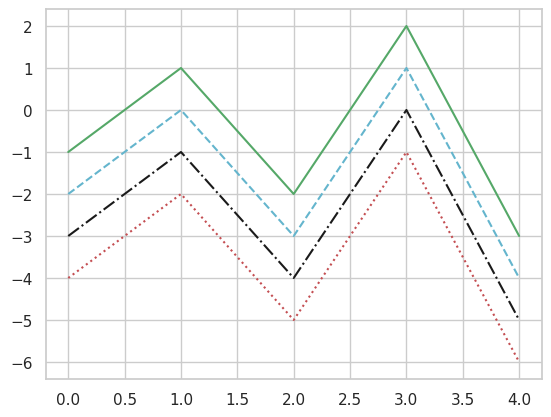

In [78]:
plt.plot(x, numpy.array(y) - 0, '-g')    # solid green, linestyle, color
plt.plot(x, numpy.array(y) - 1, '--c')   # dashed cyan
plt.plot(x, numpy.array(y) - 2, '-.k')   # dashdot black
plt.plot(x, numpy.array(y) - 3, ':r');   # dotted red

<br>

Takový zápis může být elegantním zkrácením zápisu, ale nemusí být každému ihned patrný.

Samotné písmeno potom odkazuje na standardní zkratky RGB (red/green/blue) a CMYK(Cyan/Magenta/Yellow/blacK).

<br>

### Značky

---

Dalším volitelným parametrem, pro tvorbu grafů, jsou značky bodů.

Pomocí parametru `marker` můžeš definovat značku bodu podle několika zadání:

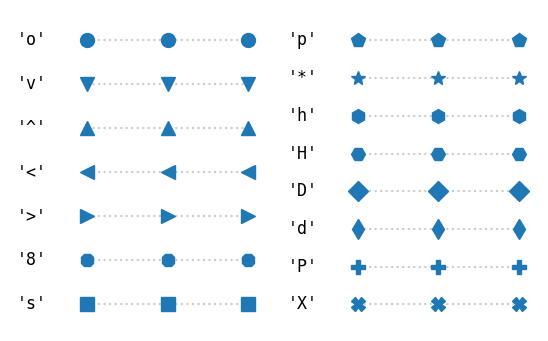

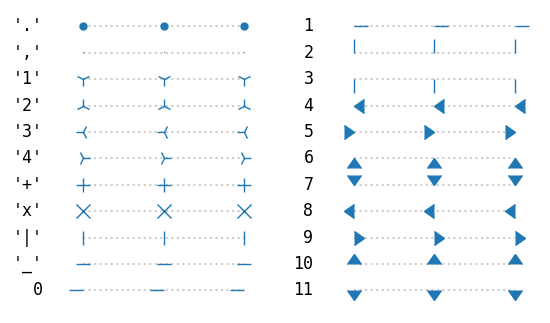


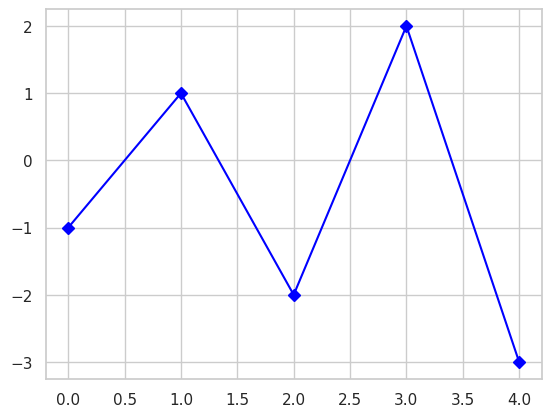

In [79]:
plt.plot(x, numpy.array(y) - 0, color='blue', marker='D')

<br>

### Mřížka grafu

---

Pokud potřebuješ, můžeš do grafu přidat mřížku:

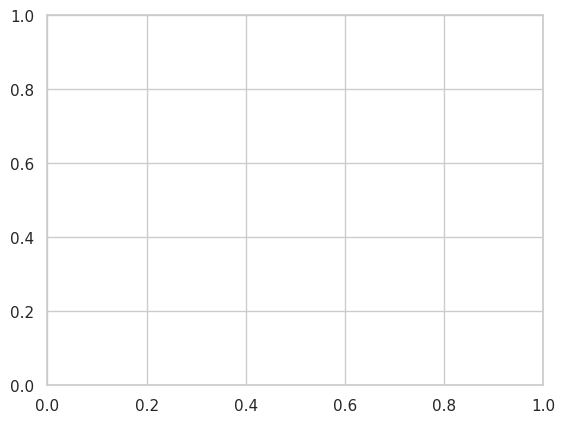

In [80]:
plt.grid(True)

<br>

Pomocí funkce `grid` můžeš nastavit také další atributy.

Jako je styl čár mřížky, barva, hlavní mřížka, vedlejší mřížka, aj.

In [81]:
# help(plt.grid)

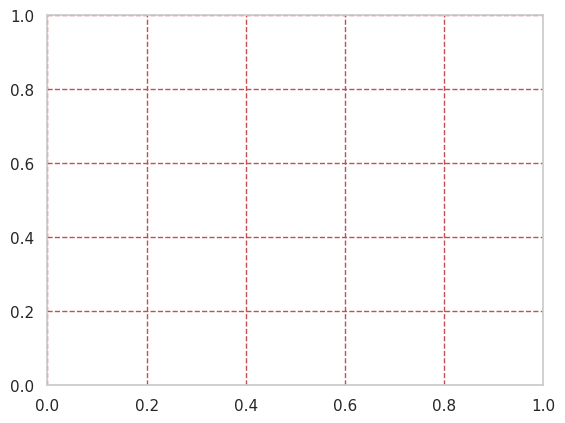

In [82]:
plt.grid(True, color='r', linestyle='--', linewidth=1)

<br>

Rozšíření stylu mřížky na hlavní a vedlejší při doplnění logaritmického měřítka:

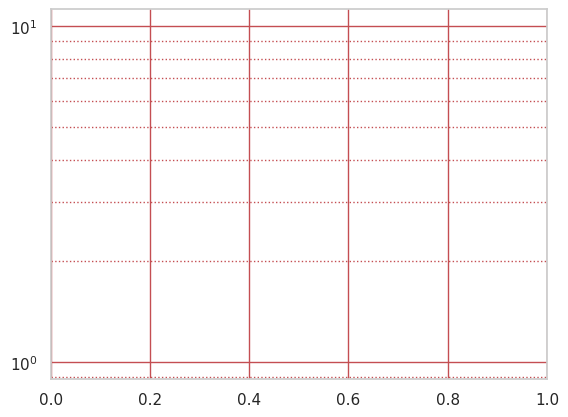

In [83]:
plt.yscale('log')
plt.grid(True, color='r', which='major', linestyle='-')
plt.grid(True, color='r', which='minor', linestyle=':')

<br>

### Nastavení osy

---

Prvním krokem, který můžeš chtít upravit jsou rozsahy **os x** a **y**.

Pomocí funkcí:
* `xlim`, nastavuješ rozsah osy X,
* `ylim`, nastavuješ rozsah osy Y.

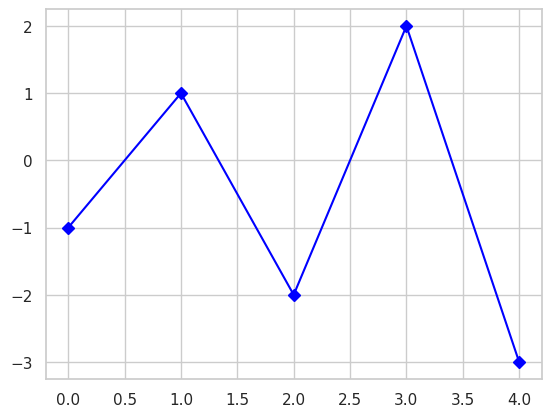

In [84]:
plt.plot(x, numpy.array(y) - 0, color='blue', marker='D') 

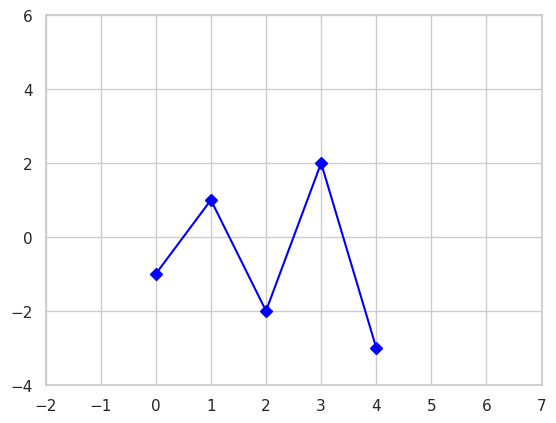

In [85]:
plt.xlim(-2, 7)
plt.ylim(-4, 6)

plt.plot(x, numpy.array(y) - 0, color='blue', marker='D') 

<br>

Osy je ale možné nastavit také pomocí funkce `axis` (neplést s `axes`).

Funkci potom předáš argumenty v podobě listu, podle vzoru: `[xmin, xmax, ymin, ymax]`.

In [86]:
type(plt.axis)

function

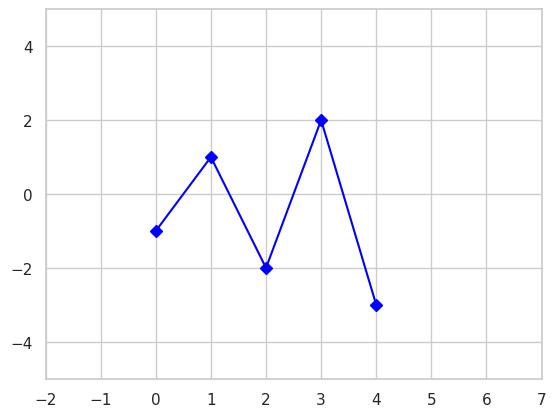

In [87]:
plt.axis([-2, 7, -5, 5])  # plt.xlim, plt.ylim
plt.plot(x, numpy.array(y) - 0, color='blue', marker='D') 

<br>

Pokud se ti nehodí, uvádět hranice explicitně, můžeš použít keyword, pro rovnoměrné rozložení `equal`:

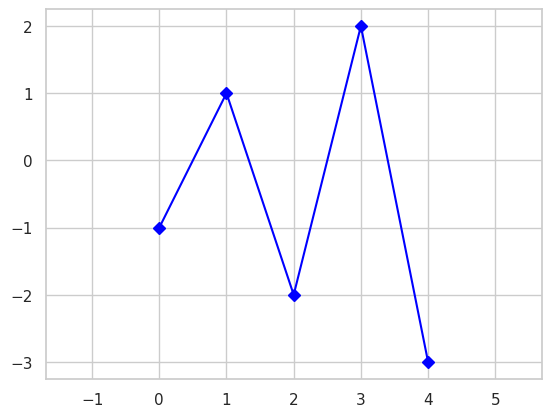

In [88]:
plt.axis('equal')  # vyzkoušej rozdíl mezi 'tight'
plt.plot(x, numpy.array(y) - 0, color='blue', marker='D') 

(-0.2, 4.2, -3.25, 2.25)

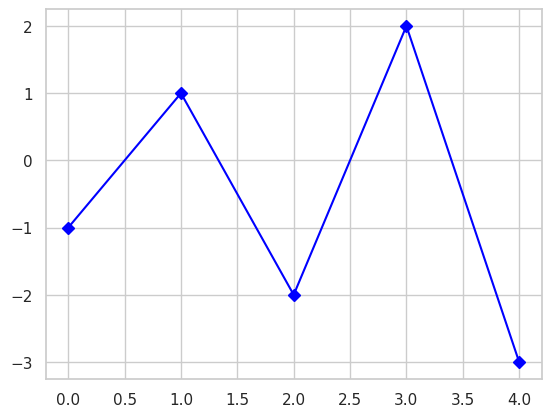

In [89]:
plt.plot(x, numpy.array(y) - 0, color='blue', marker='D') 
plt.axis('tight')

<br>

### Popisky grafu

---

Dalšími volitelnými prvky jsou **lepší popisky**:
1. `title`, název grafu,
2. `xlabel`, popis osy X,
3. `ylabel`, popis osy Y,
4. `annotate`, anotace,
5. `legend`, legenda grafu,
6. `text`, vepsaný text.

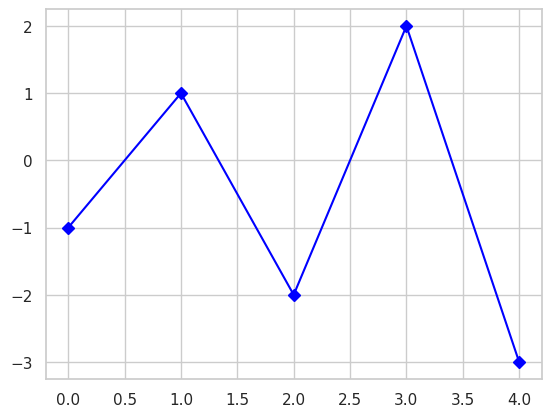

In [90]:
plt.plot(x, numpy.array(y) - 0, color='blue', marker='D', label='průběh')

Text(1, 1.6, 'maximální hodnota grafu')

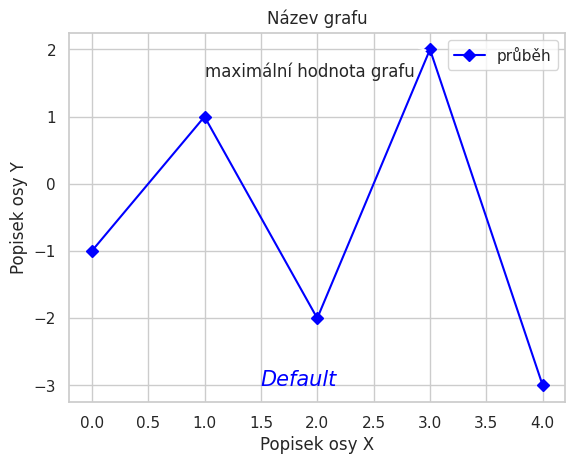

In [91]:
plt.plot(x, numpy.array(y) - 0, color='blue', marker='D', label='průběh') #  label='průběh'

plt.title('Název grafu')
plt.xlabel('Popisek osy X')
plt.ylabel('Popisek osy Y')

plt.legend()

plt.text(1.5, -3, 'Default', fontsize=15, color="blue", style="italic")

plt.annotate("maximální hodnota grafu",
             xy=(3, 2),                         # konkrétní bod
             xytext=(1, 1.6),                   # levý dolní roh textu
             arrowprops=dict(arrowstyle="->"))  # typ ukazovatele

### Úskalí s označováním

---

Přesto, že některé parametry funkce `plt` přímo přehazuje na `ax` metody:
* `plt.plot()` --> `ax.plot()`,
* `plt.legend()` --> `ax.legend()`,

**neplatí pro všechny příkazy**.

Například pro rozsahy a popisky os:
* `plt.xlabel()` --> `ax.set_xlabel()`,
* `plt.xlim()` --> `ax.set_xlim()`,

Často se můžeš setkat s metodou `set`, která slouží k všeobecném nastavování místo jednotlivých výrazů:

[(-3.0, 7.0),
 (-5.0, 5.0),
 Text(0.5, 0, 'osa X'),
 Text(0, 0.5, 'osa Y'),
 Text(0.5, 1.0, 'Název grafu')]

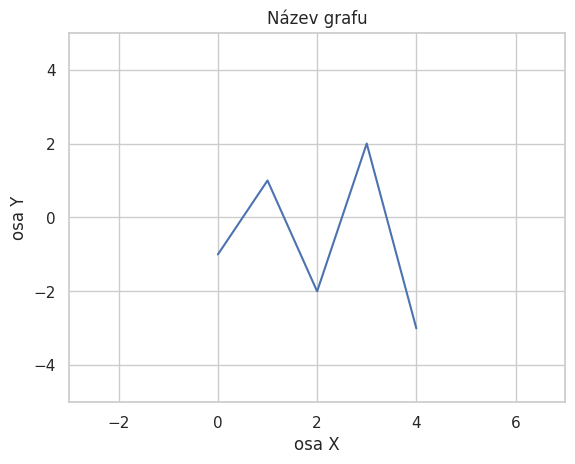

In [92]:
ax = plt.axes()
ax.plot(x, numpy.array(y) - 0)
ax.set(
    xlim=(-3, 7),
    ylim=(-5, 5),
    xlabel="osa X",
    ylabel="osa Y",
    title="Název grafu"
)

<br>

### Soubor několika grafů

---

Dalším doplňujícím prvkem je možnost nachystat několik sad grafů.

K takovému učelu slouží funkce `subplots`.

Jejím účelem je vystavit formát, jak bude sada grafů zobrazená a vykreslená.

In [93]:
type(plt.subplots)

function

In [94]:
# plt.subplot?

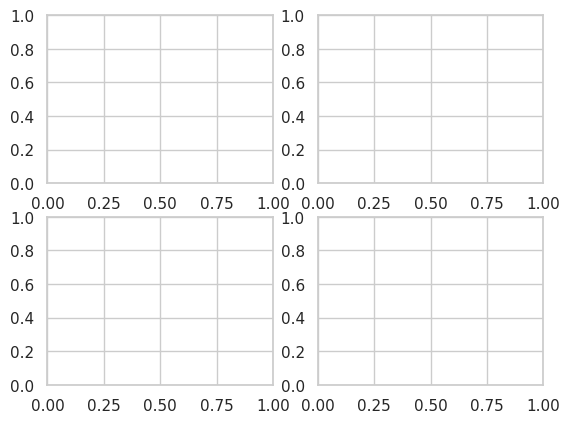

In [95]:
fig, axs = plt.subplots(
    2,               # počet řádků
    2               # počet sloupečků
    # figsize=(12, 4)  # figsize je šířka a výška v palcích
)

<br>

#### **🧠 CVIČENÍ 🧠, procvič si vizualizaci v MATPLOTLIB**

---

Máš zadané dvě kategorie výrobků a jejich časovou řadu:

1. Vytvoř roční časovou řadu pro obě kategorie výrobků (A a B) na jednom grafu,
2. Přidej **popisky os**: `'Měsíce'` pro **osu x** a `'Prodej (v tisících kusů)'` pro **osu y**,
3. Přidej **legendu pro obě kategorie** výrobků (A a B),
4. Najděte **maximální** a minimální hodnoty pro obě kategorie výrobků a anotuj je v grafu.

In [96]:
import numpy as np
import matplotlib.pyplot as plt

rada_a = [23, 35, 40, 50, 60, 70, 80, 75, 65, 55, 45, 30]
rada_b = [15, 25, 35, 45, 55, 60, 58, 52, 45, 35, 25, 18]

<details>
    <summary>▶️ Řešení</summary>
    
```python
mesice = np.arange(1, 13)
kategorie_A = np.array(rada_a)
kategorie_B = np.array(rada_b)

# Vytvoření časové řady
plt.plot(mesice, kategorie_A, label='Kategorie A')
plt.plot(mesice, kategorie_B, label='Kategorie B')

# Popisky os
plt.xlabel('Měsíce')
plt.ylabel('Prodej (v tisících kusů)')

# Legenda
plt.legend()

# Anotace maximálních a minimálních hodnot
max_A_idx = np.argmax(kategorie_A)
min_A_idx = np.argmin(kategorie_A)
max_B_idx = np.argmax(kategorie_B)
min_B_idx = np.argmin(kategorie_B)

plt.annotate('Max A', xy=(mesice[max_A_idx], kategorie_A[max_A_idx]), xytext=(mesice[max_A_idx]-1, kategorie_A[max_A_idx]+5),
             arrowprops=dict(arrowstyle='->'))
plt.annotate('Min A', xy=(mesice[min_A_idx], kategorie_A[min_A_idx]), xytext=(mesice[min_A_idx]-1, kategorie_A[min_A_idx]-10),
             arrowprops=dict(arrowstyle='->'))
plt.annotate('Max B', xy=(mesice[max_B_idx], kategorie_B[max_B_idx]), xytext=(mesice[max_B_idx]-1, kategorie_B[max_B_idx]+5),
             arrowprops=dict(arrowstyle='->'))
plt.annotate('Min B', xy=(mesice[min_B_idx], kategorie_B[min_B_idx]), xytext=(mesice[min_B_idx]-1, kategorie_B[min_B_idx]-10),
             arrowprops=dict(arrowstyle='->'))

# Zobrazení grafu
plt.show()

rada_a_np = np.array( rada_a )
rada_b_np = np.array( rada_b )


#Vytvoření popisků pro graf
mesice = list( range( 1, 13 ) )
mesice_text = ['Leden', 'Únor', 'Březen', 'Duben', 'Květen', 'Červen', 'Červenec', 'Srpen', 'Září', 'Říjen', 'Listopad', 'Prosinec']
max_annotation, min_annotation = 'MAX', 'MIN'
label_a, label_b = 'Produkt A', 'Produkt B'
plot_title = 'Srovnání prodeje produktů A a B'
x_label, y_label = 'Měsíce', 'Prodej (v tisících ks)'
color_a, color_b = 'blue', 'red'  #Definice barev


#Vytvoření grafu a přidání řad
plt.plot( mesice, rada_a_np, color = color_a, marker = 'o', label = label_a )
plt.plot( mesice, rada_b_np, color = color_b, marker = 'o', label = label_b )


#Přidání popisků grafu a legendy
plt.title( plot_title, fontsize = 22 )
plt.xlabel( x_label, fontsize = 14 )
plt.ylabel( y_label, fontsize = 14 )
plt.legend( )
plt.xticks( mesice, mesice_text, rotation = 45 )


#Úprava velikosti grafu
plt.gcf( ).set_size_inches( 10, 5 )


#Zobrazení maxima/minima
plt.annotate(
    max_annotation, 
    xy = ( rada_a_np.argmax( ) + 1, rada_a_np.max( ) ),
    xytext =( rada_a_np.argmax( ) - 2, rada_a_np.max( ) - 1 ), 
    arrowprops = dict( facecolor = color_a, shrink = 0.05 ) 
)
plt.annotate(
    max_annotation, 
    xy = ( rada_b_np.argmax( ) + 1, rada_b_np.max( ) ),
    xytext =( rada_b_np.argmax( ) + 1, rada_b_np.max( ) - 25 ), 
    arrowprops = dict( facecolor = color_b, shrink = 0.05 ) 
)
plt.annotate(
    min_annotation, 
    xy = ( rada_a_np.argmin( ) + 1, rada_a_np.min( ) ),
    xytext =( rada_a_np.argmin( ) + 1, rada_a_np.min( ) + 25 ), 
    arrowprops = dict( facecolor = color_a, shrink = 0.05 ) 
)
plt.annotate(
    min_annotation, 
    xy = ( rada_b_np.argmin( ) + 1, rada_b_np.min( ) ),
    xytext = ( rada_b_np.argmin( ) + 3, rada_b_np.min( ) - 1 ), 
    arrowprops = dict( facecolor = color_b, shrink = 0.05 ) 
)


#Zobrazení grafu
plt.show( )
```
</details>

<br>

## Kombinace PANDAS a MATPLOTLIB

---

Další výhodou, je kombinace s frameworkem **pandas**.

Přímé spojení dat s definicí grafů ale `matplotlib` nepodporuje.

<br>

Stažení pomocného datasetu:

In [97]:
import pandas as pd

In [98]:
URL = 'https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue'
df_wiki = pd.read_html(URL)

In [99]:
df_companies = df_wiki[0]

<br>

Zkontroluj jména všech sloupečků:

In [100]:
df_companies.columns

MultiIndex([(                'Rank',                 'Rank'),
            (                'Name',                 'Name'),
            (            'Industry',             'Industry'),
            (             'Revenue',    'USD (in millions)'),
            (              'Profit',    'USD (in millions)'),
            (           'Employees',            'Employees'),
            ('Headquarters[note 1]', 'Headquarters[note 1]'),
            (         'State-owned',          'State-owned'),
            (                'Ref.',                 'Ref.')],
           )

<br>

Vyběr sloupců 'Name', 'Revenue', 'Profit', 'Employees' a převedení na malá pismena:

In [101]:
df_companies = df_companies.loc[:, ['Name', 'Rank', 'Revenue', 'Profit', 'Employees']]

In [102]:
df_companies.head()

,Name,Rank,Revenue,Profit,Employees
,Name,Rank,USD (in millions),USD (in millions),Employees
0,Walmart,1,"$680,985","$19,436",2100000
1,Amazon,2,"$637,959","$59,248",1556000
2,State Grid Corporation of China,3,"$545,948","$9,204",1361423
3,Saudi Aramco,4,"$480,446","$106,246",73311
4,China Petrochemical Corporation,5,"$429,700","$9,393",513434


In [103]:
df_companies.columns = df_companies.columns.get_level_values(0).str.lower()

In [104]:
df_companies.columns

Index(['name', 'rank', 'revenue', 'profit', 'employees'], dtype='object')

In [105]:
df_companies.head()

,name,rank,revenue,profit,employees
0,Walmart,1,"$680,985","$19,436",2100000
1,Amazon,2,"$637,959","$59,248",1556000
2,State Grid Corporation of China,3,"$545,948","$9,204",1361423
3,Saudi Aramco,4,"$480,446","$106,246",73311
4,China Petrochemical Corporation,5,"$429,700","$9,393",513434


In [106]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       50 non-null     object
 1   rank       50 non-null     int64 
 2   revenue    50 non-null     object
 3   profit     50 non-null     object
 4   employees  50 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


<br>

Přetypuj na vhodnější datový typ, pro porovnání a seřazení hodnot:

In [107]:
def format_usd_to_number(text: str) -> float:
    return float(text.replace('$','').replace(',','').replace('–', '-'))

In [108]:
df_companies['revenue'] = df_companies['revenue'].apply(format_usd_to_number)
df_companies['profit'] = df_companies['profit'].apply(format_usd_to_number)

In [109]:
df_companies.head()

,name,rank,revenue,profit,employees
0,Walmart,1,680985.0,19436.0,2100000
1,Amazon,2,637959.0,59248.0,1556000
2,State Grid Corporation of China,3,545948.0,9204.0,1361423
3,Saudi Aramco,4,480446.0,106246.0,73311
4,China Petrochemical Corporation,5,429700.0,9393.0,513434


In [110]:
df_top_10_comp = df_companies.sort_values(
    by=['profit'], ascending=[False]
).copy().head(10)

In [111]:
df_top_10_comp

,name,rank,revenue,profit,employees
3,Saudi Aramco,4,480446.0,106246.0,73311
10,Alphabet,11,350018.0,100118.0,183323
7,Apple,8,391035.0,93736.0,164000
8,Berkshire Hathaway,9,371433.0,88995.0,392400
19,Microsoft,20,245122.0,88136.0,228000
1,Amazon,2,637959.0,59248.0,1556000
23,Industrial and Commercial Bank of China,24,222484.0,51417.0,419252
22,JPMorgan Chase,23,239425.0,49552.0,309926
30,China Construction Bank,31,199826.0,46990.0,376871
34,Agricultural Bank of China,35,192398.0,38049.0,451003


/tmp/ipykernel_51267/164476458.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


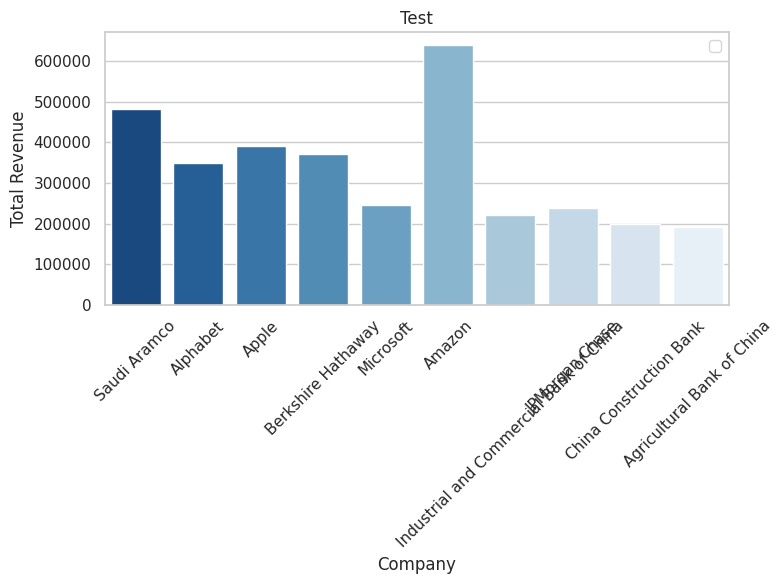

In [112]:
# Vykreslení horizontálního sloupcového grafu
fig, ax = plt.subplots(figsize=(8, 6))

# Seaborn barplot
sns.barplot(
    data=df_top_10_comp,
    x='name',
    y='revenue',
    ax=ax,
    palette='Blues_r'
)

# Nastavení grafu
ax.set(
    title='Test',
    xlabel='Company',
    ylabel='Total Revenue',
)
ax.legend()

plt.xticks(rotation=45)

# Zobrazení grafu
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Revenue'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0, 0.5, 'Company')]

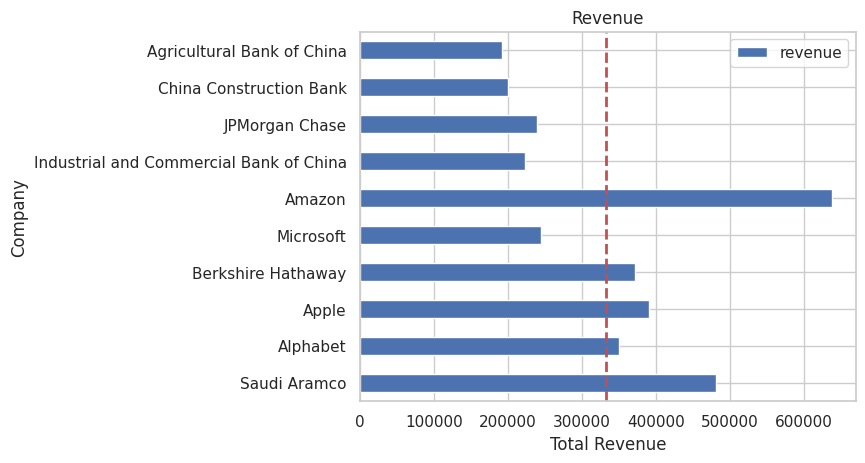

In [113]:
ax = plt.axes()

avg = df_top_10_comp['revenue'].mean()
ax.axvline(x=avg, color='r', label='Average', linestyle='--', linewidth=2)

df_top_10_comp.plot(kind='barh', x="name", y="revenue", ax=ax)  # plot z 'pandas'

# plt.plot(df_top_10_comp["name"], df_top_10_comp["profit"], ...)

ax.set(title='Revenue',
       xlabel='Total Revenue',
       ylabel='Company')

In [114]:
# df_top_10_comp.plot?

<br>

#### **🧠 CVIČENÍ 🧠, procvič si PANDY s grafy v MATPLOTLIB**

---

Máš dataset o cenách domů (`housing.csv`), který obsahuje následující sloupce: id, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition, grade.

1. Načti dataset pomocí knihovny `pandas`.
2. vytvoř nový sloupec `price_per_sqft` tím, že cenu (`price`) vydělíš počtem čtverečních metrů (`sqft_living`).
3. vytvoř histogram, který zobrazuje rozdělení cen za čtvereční metr (`price_per_sqft`).
4. nastav vhodné **popisky os** a **legendu**.
5. ulož graf jako obrázek ve formátu PNG.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

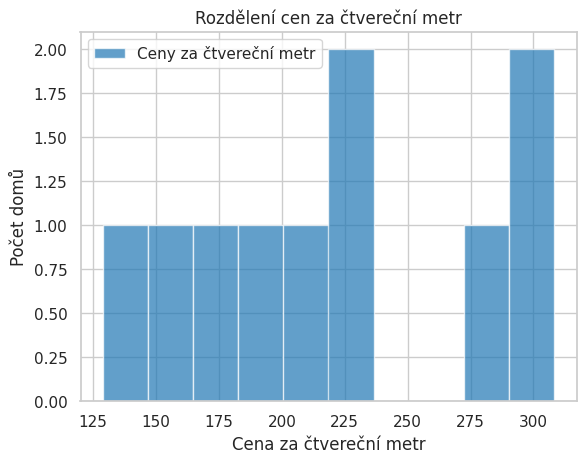

In [116]:
df = pd.read_csv("../onsite/housing.csv")

# 2. Vytvořte nový sloupec 'price_per_sqft'
df["price_per_sqft"] = df["price"] / df["sqft_living"]

# 3. Vytvořte histogram
fig, ax = plt.subplots()
ax.hist(df["price_per_sqft"], bins=10, color='#1f77b4', alpha=0.7)

# 4. Nastavte vhodné popisky os a legendu
ax.set_title("Rozdělení cen za čtvereční metr")
ax.set_xlabel("Cena za čtvereční metr")
ax.set_ylabel("Počet domů")
ax.legend(["Ceny za čtvereční metr"])

# 5. Uložte graf jako obrázek ve formátu PNG
plt.savefig("price_per_sqft_histogram.png", dpi=300, bbox_inches='tight')

# Zobrazení grafu
plt.show()

<details>
    <summary>▶️ Řešení</summary>
    
```python
# 1. Načtěte dataset pomocí knihovny pandas
df = pd.read_csv("housing.csv")

# 2. Vytvořte nový sloupec 'price_per_sqft'
df["price_per_sqft"] = df["price"] / df["sqft_living"]

# 3. Vytvořte histogram
fig, ax = plt.subplots()
ax.hist(df["price_per_sqft"], bins=10, color='#1f77b4', alpha=0.7)

# 4. Nastavte vhodné popisky os a legendu
ax.set_title("Rozdělení cen za čtvereční metr")
ax.set_xlabel("Cena za čtvereční metr")
ax.set_ylabel("Počet domů")
ax.legend(["Ceny za čtvereční metr"])

# 5. Uložte graf jako obrázek ve formátu PNG
plt.savefig("price_per_sqft_histogram.png", dpi=300, bbox_inches='tight')

# Zobrazení grafu
plt.show()
```
</details>

## Vizualizace pomocí knihovny SEABORN

---



`Matplotlib` se ukázal být neuvěřitelně užitečným a oblíbeným vizualizačním nástrojem.

Intuitivní a dnes pořád jako solidní základ pro pochopení vizualizace.

Přesto i někteří zanícení uživatelé připouštějí, že je v něm často mnoho nedostatků.

Zásadní zářez je, že knihovna je o více než dekádu starší, než framework `pandas`.
Tím pádem není navrhovaná pro práci s datovým typem `DataFrame`.

Je tedy nutné, extrahovat objekty typu `Series` a ty aplikovat samotné.

Vygeneruješ si náhodnou řadu čísel:

In [117]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.RandomState(0).randn(500, 6), 0)

<br>

Zobrazíš pomocí `matplotlib`:

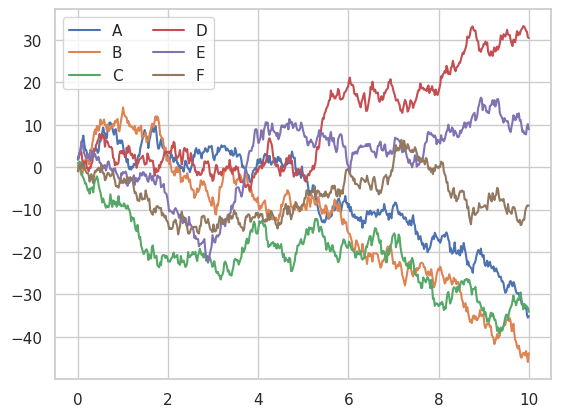

In [118]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

<br>

Nachystáš knihovnu `seaborn`:

In [119]:
import seaborn as sns
sns.set()

<br>

`seaborn` má mnoho vlastní objektů a prvků na používání.

Implicitně umí přepisovat výstup z `matplotlib`.

Pokud tedy nyní spustíš stejný kus kódu ale graf se zobrazí pomocí knihovny `seaborn`:

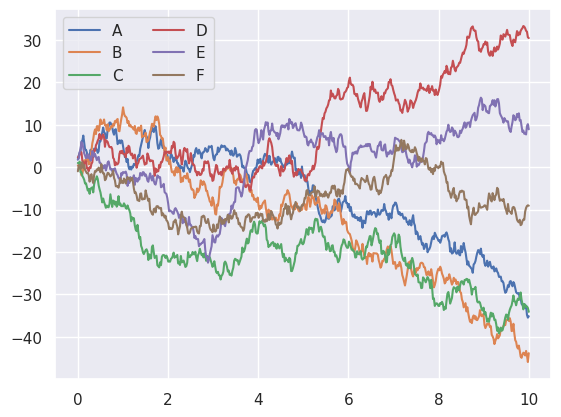

In [120]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

<br>

pokud si nebudeš přát pracovat s knihovnou `seaborn`, můžeš proces vrátit `sns.reset_orig()`.

<br>

Nahraješ si předdefinovaný datový set s historickými informacemi:

In [121]:
flights = sns.load_dataset("flights")

In [122]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [123]:
type(flights)

pandas.core.frame.DataFrame

In [124]:
only_apr_flights = flights[flights["month"] == "Apr"]

In [125]:
only_apr_flights

,year,month,passengers
3,1949,Apr,129
15,1950,Apr,135
27,1951,Apr,163
39,1952,Apr,181
51,1953,Apr,235
63,1954,Apr,227
75,1955,Apr,269
87,1956,Apr,313
99,1957,Apr,348
111,1958,Apr,348


<Axes: xlabel='year', ylabel='passengers'>

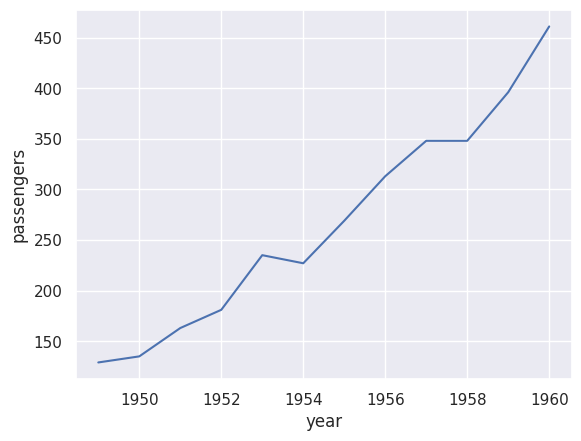

In [126]:
sns.lineplot(data=only_apr_flights, x="year", y="passengers")

---